In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


import warnings 
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
train.shape


(8693, 14)

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.shape

(4277, 13)

In [6]:

test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Here in the test data, there isn't a column named transport which is in the train data. So, we have to predict whether a passenger is 'Transported or not', using the test data and by training the model by train data.

In [7]:
train.duplicated().sum()

0

In [8]:
test.duplicated().sum()

0

From above we can see that there are no duplicates in the either of the datasets.

In [9]:
print(train.dtypes)
print('\n')
print('.'*99)
print('\n')
print(test.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


...................................................................................................


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


From the heads data of both train and test, we can see that cryosleep and VIP columns contains boolean values. But we see that their datatypes are object. We have to convert object to bool datatype while data preprocessing.

In [10]:
print(train.isnull().sum())
print('\n'+'.'*99+'\n')
print(test.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

...................................................................................................

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [11]:
print(round((train.isnull().sum()*100)/len(train),2))
print('\n'+'.'*99+'\n')
print(round((test.isnull().sum()*100)/len(test),2))

PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64

...................................................................................................

PassengerId     0.00
HomePlanet      2.03
CryoSleep       2.17
Cabin           2.34
Destination     2.15
Age             2.13
VIP             2.17
RoomService     1.92
FoodCourt       2.48
ShoppingMall    2.29
Spa             2.36
VRDeck          1.87
Name            2.20
dtype: float64


We can see that the percentage of missing values are very less in percentage in both test and train data sets. So we can drop this rows or can fill the missing data with the suitable values.

In [12]:
print(train.nunique())
print('\n'+'.'*99+'\n')
print(test.nunique())

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

...................................................................................................

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64


In [13]:
print(train.select_dtypes(include = 'object').nunique())
print('\n'+'.'*99+'\n')
print(test.select_dtypes(include = 'object').nunique())

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

...................................................................................................

PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


We can see that the PassengerID, Cabin, Name have high cardinality i.e., high unique values. so we usually drop these columns before training the model. But here, we do feature engineering in order to increase the data there by increasing the model performance and accuracy.

# Exploratory data anlysis (EDA)

<Axes: xlabel='Transported', ylabel='count'>

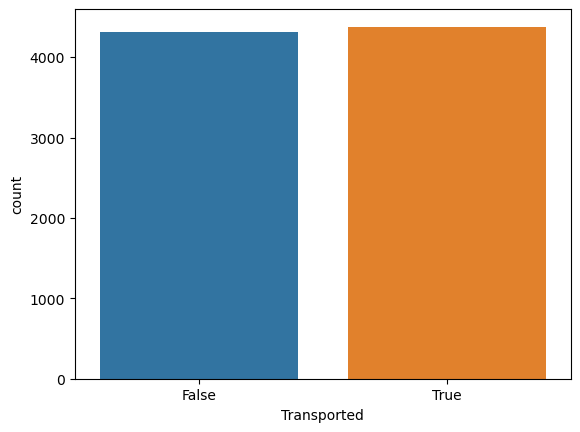

In [14]:
sns.countplot(x = 'Transported', data = train)

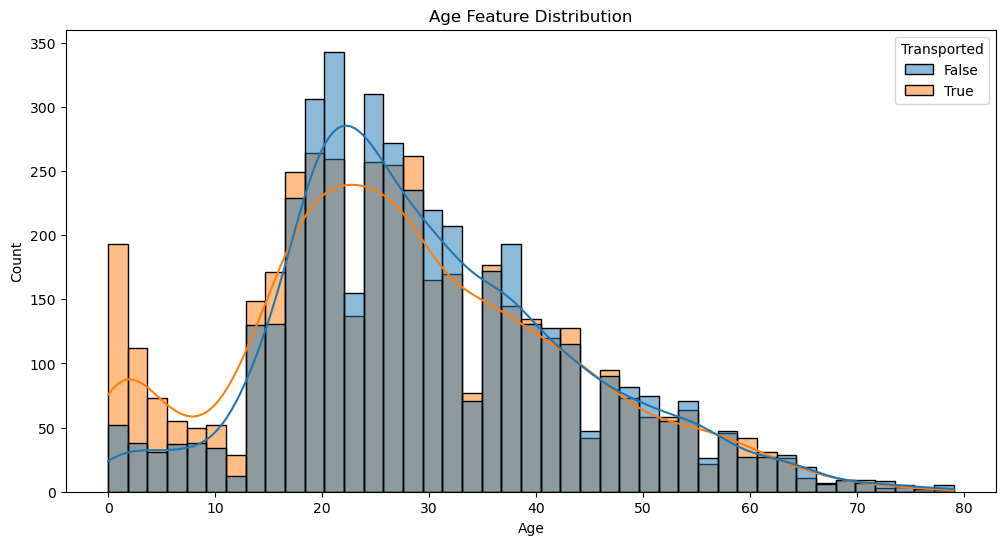

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(x=train["Age"],hue="Transported",data=train, kde = True)
plt.title("Age Feature Distribution");

* Between age 18-34 most of the passengers were not transported compared to transported people
* Passangers with age <18 are transported compared to non-transported passengers. Especially, tiny kids were highly transported.
* Passengers with age >34 were almost equally transported.

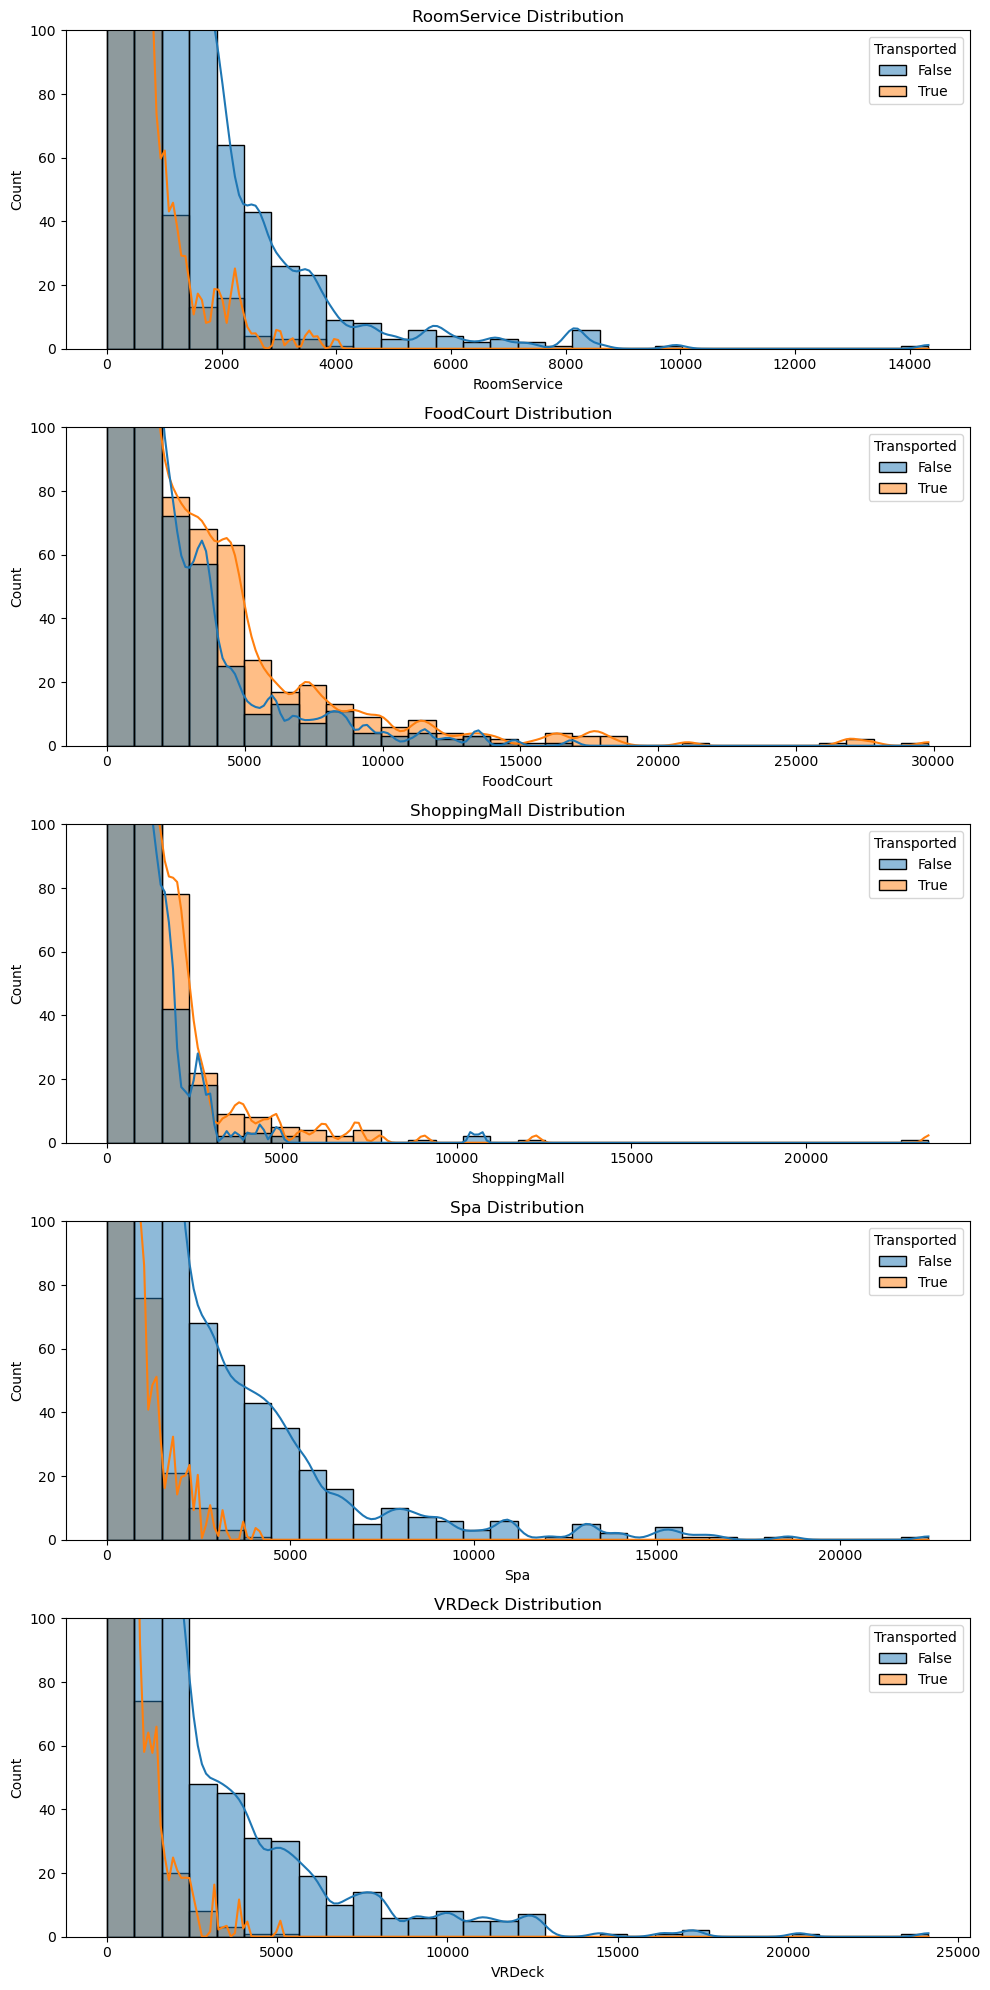

In [16]:
plt.figure(figsize=(10,20))
for ind,column in enumerate(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    plt.subplot(5,1,ind+1)
    sns.histplot(x=column, hue="Transported", data=train,bins=30,kde=True)
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()

* Most of the people were tend to spend less money on expenditures
* We can see that roomservice, spa, vrdeck have similar kind of distributions and foodcourt, shopping mall have similar distributions.
* Most of the people who spent less expences have been transported.
* There were also many people who didnt spend any amount on expenses. So the values with high expenses are outliers. 

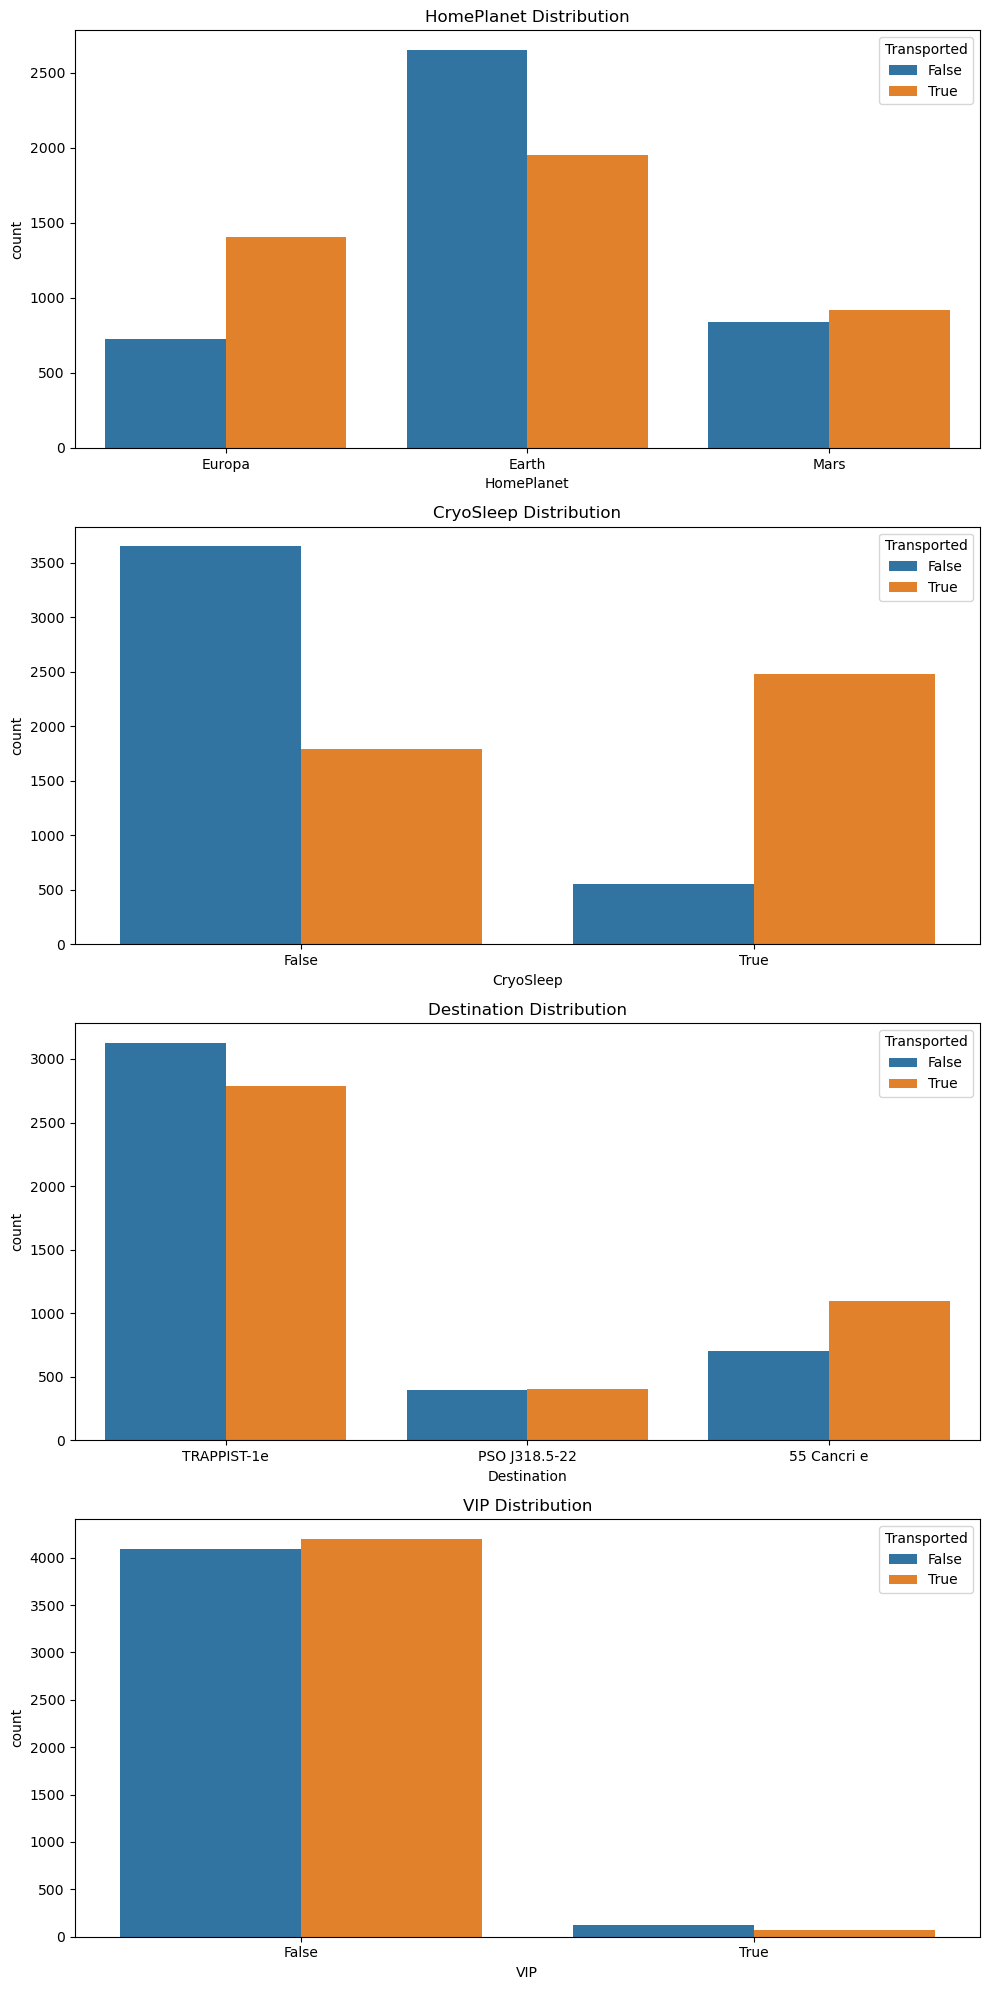

In [17]:
plt.figure(figsize=(10,20))
for ind,column in enumerate(['HomePlanet', 'CryoSleep', 'Destination', 'VIP']):
    plt.subplot(4,1,ind+1)
    sns.countplot(x=column, hue='Transported', data=train)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

* From homeplanet distribution, we can see that most of the passengers from the earth and people from earth were less transported, people from mars were equally transported and people from europa were highly transported
* From Crysleep Distribution, we can see that most of the passengers were not in cryosleep, but passengers who were in sleep were transported effectively.
* From Destination distribution, we can see that most of the passengers were destined to trappist and almost people were equally transported to the three destinations.
* From VIP distribution, we can see that a very few people (about 500 only) took VIP pass, but despite of taking VIP pass they were also equally transported.

**In this categorical features, in VIP there is pure domination of one class, which can lead to over fitting of model. So it is better to drop that particular feature.**

# Feature Engineering

In [18]:
def featEnggPassengerId(df):
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    x = df.groupby('Group')['Member'].count().sort_values()
    
    y = set(x[x>1].index)
    
    df['Solo'] = df["Group"].apply(lambda x: x not in y)
    
    df['NoOfGroupMem'] = 0
    for i in x.items():
        df.loc[df['Group']== i[0], 'NoOfGroupMem'] = i[1]
        
    

In [19]:
featEnggPassengerId(train)
featEnggPassengerId(test)

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Solo,NoOfGroupMem
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


In [21]:
train.drop(columns = ['Group', 'Member'], inplace = True)
test.drop(columns = ['Group', 'Member'], inplace = True)

Text(0.5, 1.0, 'Solo travellers vs Transported')

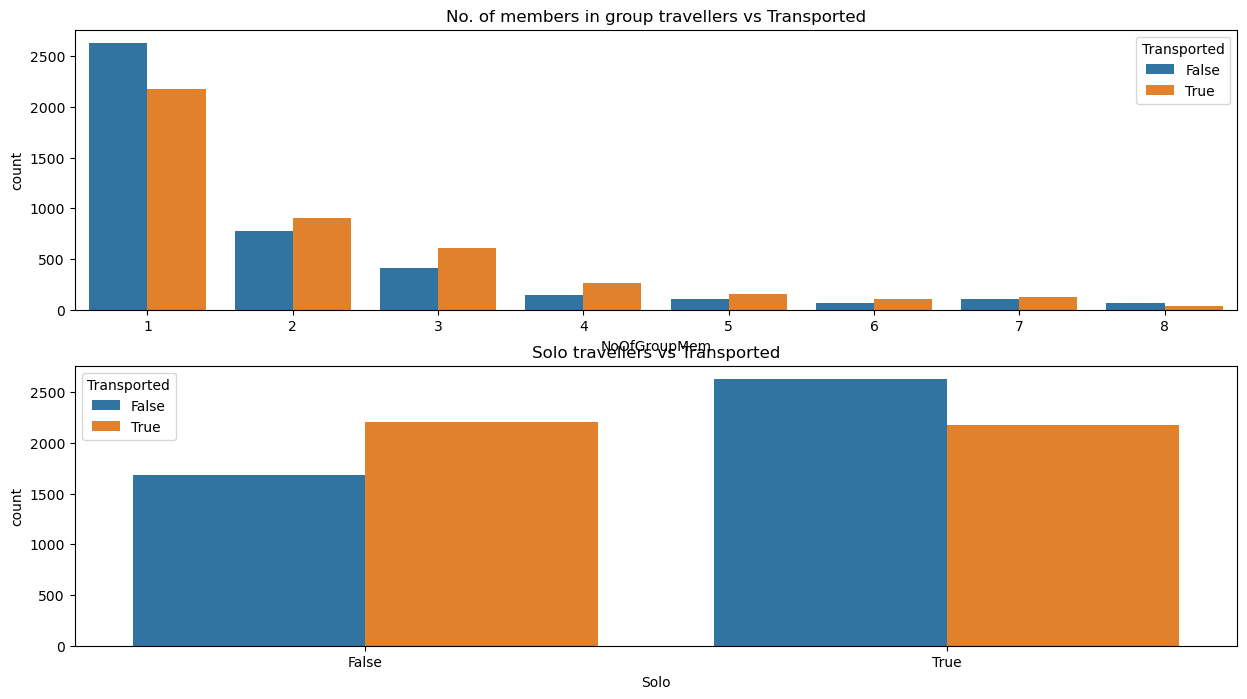

In [22]:
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
sns.countplot(x = 'NoOfGroupMem', hue = 'Transported', data = train)
plt.title('No. of members in group travellers vs Transported')

plt.subplot(2,1,2)
sns.countplot(x = 'Solo', hue = 'Transported', data = train)
plt.title('Solo travellers vs Transported')

In [23]:
def featEnggCabin(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
    
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [24]:
featEnggCabin(train)
featEnggCabin(test)

In [25]:
print(train['Cabin_Deck'].dtype)
print(train['Cabin_Side'].dtype)
print(train['Cabin_Number'].dtype)

object
object
object


In [26]:
print(train['Cabin_Deck'].nunique())
print(train['Cabin_Side'].nunique())
print(train['Cabin_Number'].nunique())

8
2
1818


We can see that there are 1818 unique instances in the 'Cabin_Number'. We cant visualize the cabin number data using count plot, instead we use histplot.
For histplot the datatype of the column should not be an object.

In [27]:
train["Cabin_Number"]=train["Cabin_Number"].astype(int)
test["Cabin_Number"]=test["Cabin_Number"].astype(int)

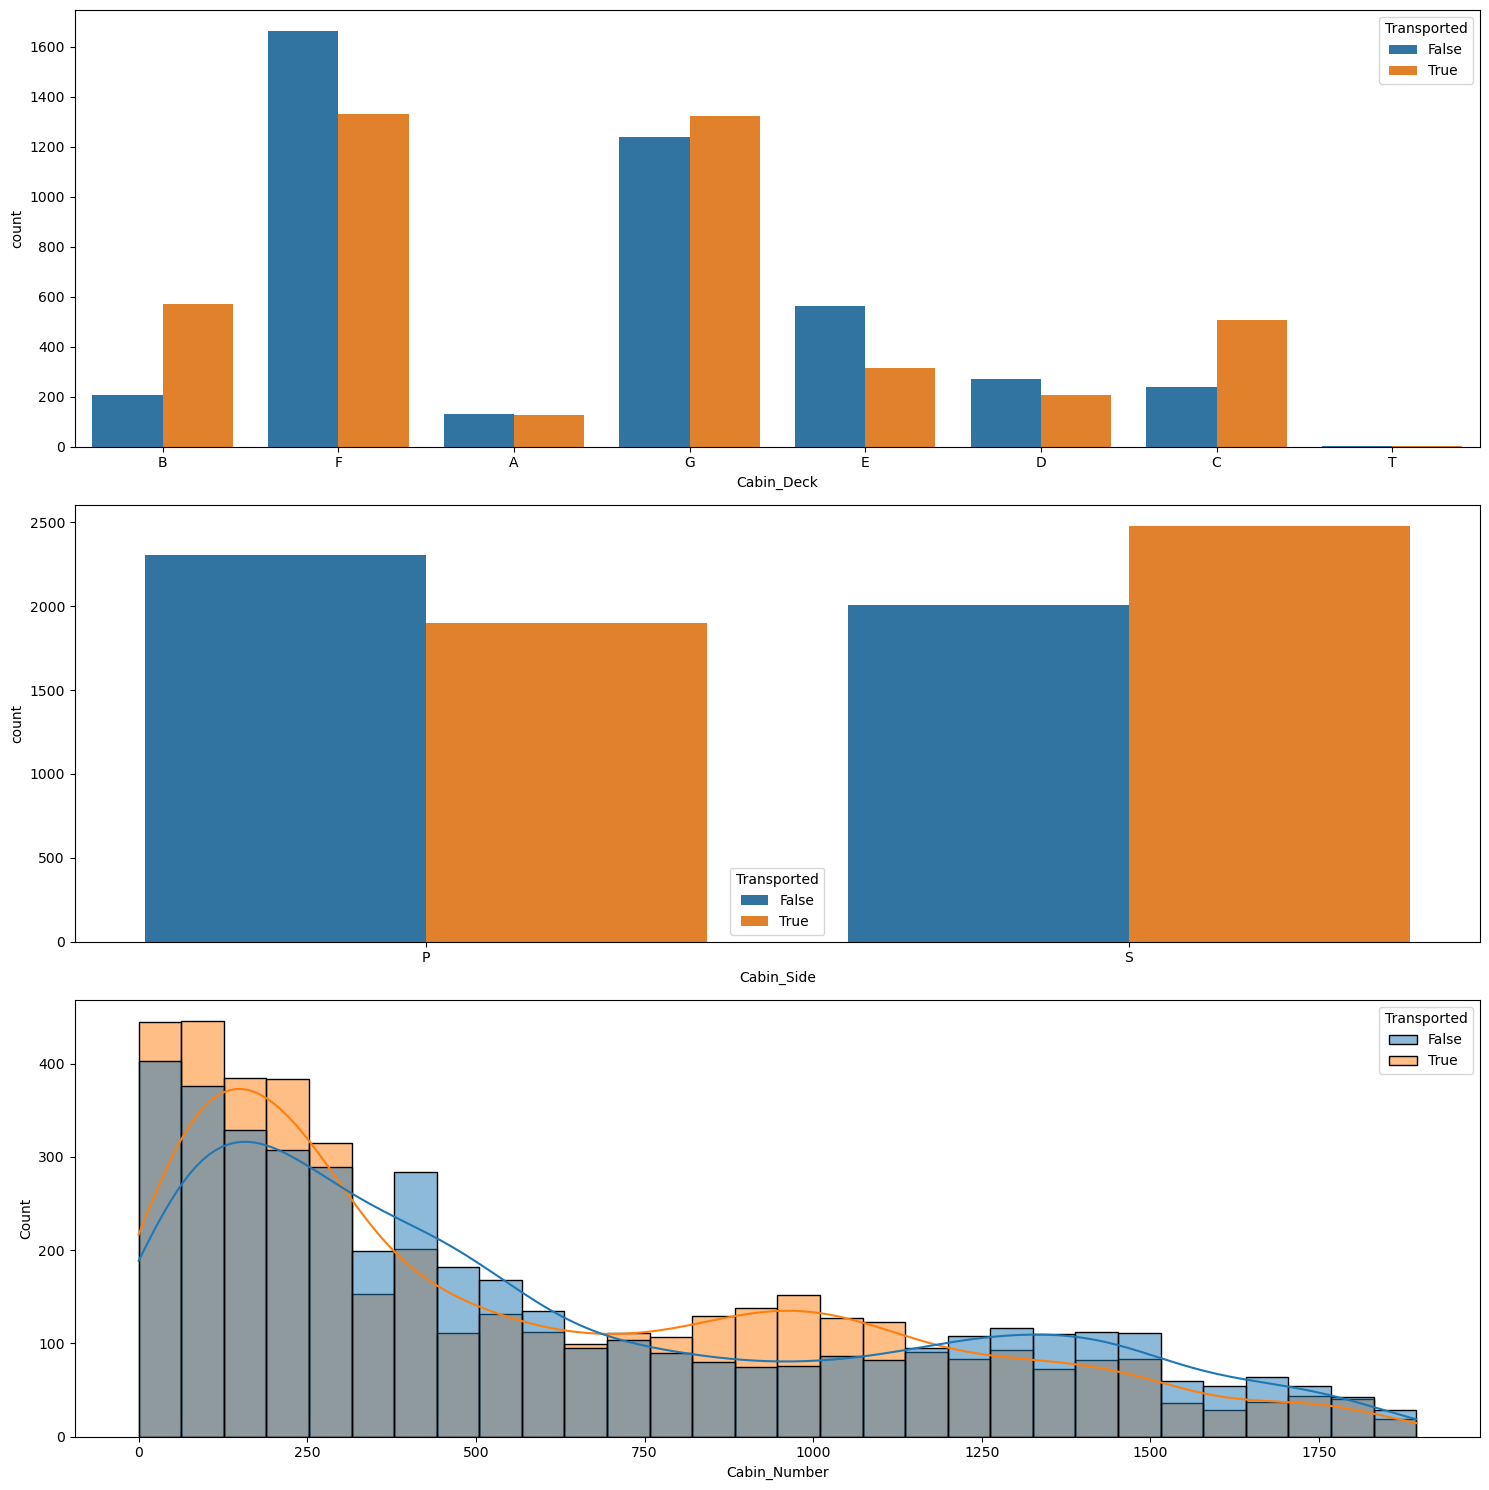

In [28]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.countplot(x = 'Cabin_Deck', hue = 'Transported', data = train)

plt.subplot(3,1,2)
sns.countplot(x = 'Cabin_Side', hue = 'Transported', data = train)

plt.subplot(3,1,3)
sns.histplot(x = 'Cabin_Number', hue = 'Transported', data = train, bins= 30, kde= True)

plt.tight_layout()
plt.show()




Here we can see that in a group of 250, there is a trend of people being transported or not. So we can use this feature also.

In [29]:
def cabinRegion(df):
    df['CabinRegion1'] = df['Cabin_Number']<250 
    df['CabinRegion2'] = (df['Cabin_Number']>=250) & (df['Cabin_Number']<500)
    df['CabinRegion3'] = (df['Cabin_Number']>=500) & (df['Cabin_Number']<750)
    df['CabinRegion4'] = (df['Cabin_Number']>=750) & (df['Cabin_Number']<1000)
    df['CabinRegion5'] = (df['Cabin_Number']>=1000) & (df['Cabin_Number']<1250)
    df['CabinRegion6'] = (df['Cabin_Number']>=1250) & (df['Cabin_Number']<1500)
    df['CabinRegion7'] = (df['Cabin_Number']>=1500) & (df['Cabin_Number']<1750)
    df['CabinRegion8'] = df['Cabin_Number']>=1750

In [30]:
cabinRegion(train)
cabinRegion(test)

In [31]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Solo,NoOfGroupMem,Cabin_Deck,Cabin_Number,Cabin_Side,CabinRegion1,CabinRegion2,CabinRegion3,CabinRegion4,CabinRegion5,CabinRegion6,CabinRegion7,CabinRegion8
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,B,0,P,True,False,False,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1,F,0,S,True,False,False,False,False,False,False,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,2,A,0,S,True,False,False,False,False,False,False,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,2,A,0,S,True,False,False,False,False,False,False,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,1,F,1,S,True,False,False,False,False,False,False,False


In [32]:
train.drop(columns = 'Cabin_Number', axis =1, inplace = True)
test.drop(columns = 'Cabin_Number', axis =1, inplace = True)

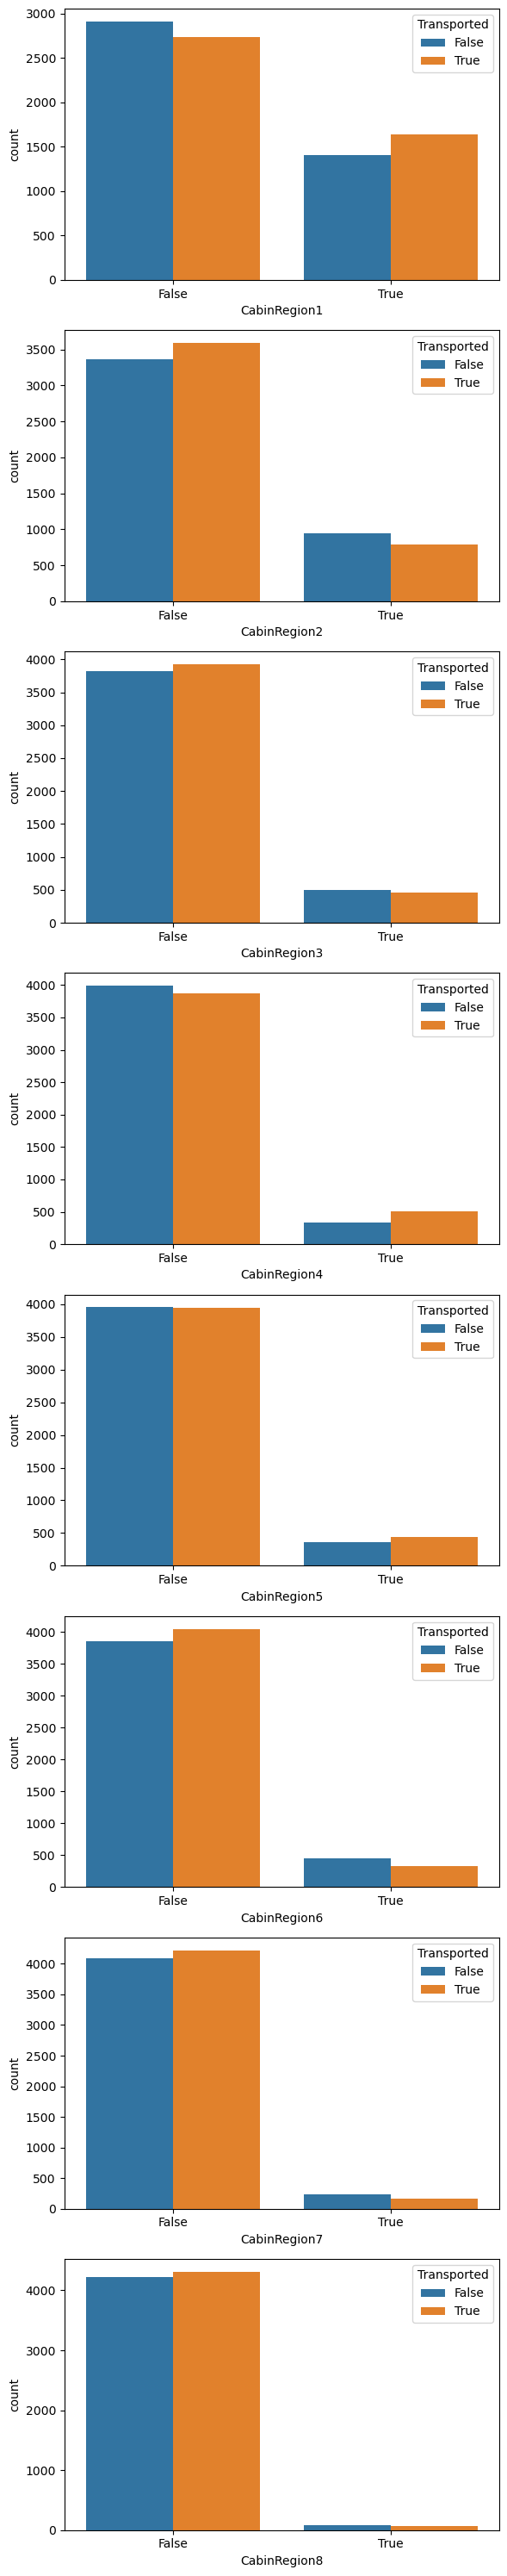

In [33]:
plt.figure(figsize=(6,30))

for ind,column in enumerate(['CabinRegion1', 'CabinRegion2', 'CabinRegion3', 'CabinRegion4', 'CabinRegion5', 'CabinRegion6', 'CabinRegion7', 'CabinRegion8']):
    plt.subplot(8,1,ind+1)
    sns.countplot(x=column, hue = 'Transported', data = train)
    plt.tight_layout()
    


We can see that as the cabin region increases the people that are being transported decreases.

In [34]:
print(train['Age'].isnull().sum())
print(train['Age'].mode())
print(train['Age'].mean())
print(train['Age'].median())

179
0    24.0
Name: Age, dtype: float64
28.82793046746535
27.0


We can see that there are null values in the age column. We can split the age feature into groups and fill the missing data with the mode of that age group.

In [35]:
def ageGroups(df):
    df['Age 0-9'] = (df['Age'] < 10) & df['Age'].notnull()
    df['Age 10-19'] = (df['Age'] >= 10) & (df['Age'] < 20) & df['Age'].notnull()
    df['Age 20-29'] = (df['Age'] >= 20) & (df['Age'] < 30) & df['Age'].notnull()
    df['Age 30-39'] = (df['Age'] >= 30) & (df['Age'] < 40) & df['Age'].notnull()
    df['Age 40-49'] = (df['Age'] >= 40) & (df['Age'] < 50) & df['Age'].notnull()
    df['Age 50 and above'] = (df['Age'] >= 50) & df['Age'].notnull()



In [36]:
ageGroups(train)
ageGroups(test)

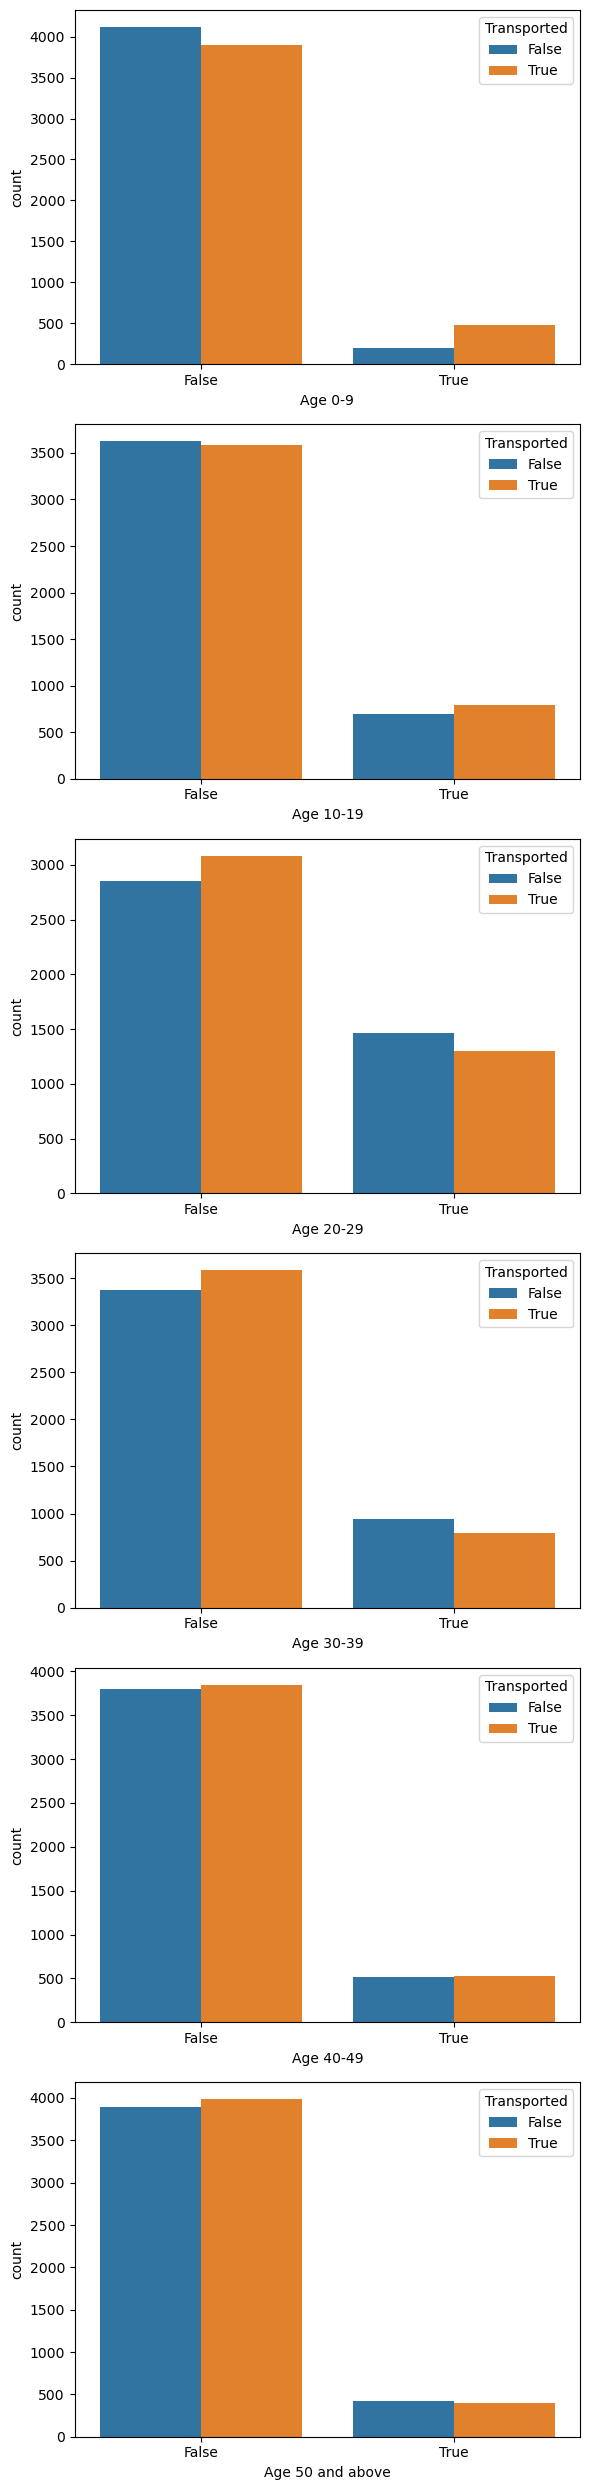

In [37]:
plt.figure(figsize=(6,25))

for ind,column in enumerate(['Age 0-9', 'Age 10-19', 'Age 20-29', 'Age 30-39', 'Age 40-49', 'Age 50 and above']):
    plt.subplot(6,1,ind+1)
    sns.countplot(x=column, hue = 'Transported', data = train)
    plt.tight_layout()

In [38]:
train.drop(columns = 'Age', axis =1, inplace = True)
test.drop(columns = 'Age', axis =1, inplace = True)

In [39]:
def featEnggExpenses(df):
    df["Total Expenditure"] = df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)

In [40]:
featEnggExpenses(train)
featEnggExpenses(test)

(0.0, 15000.0)

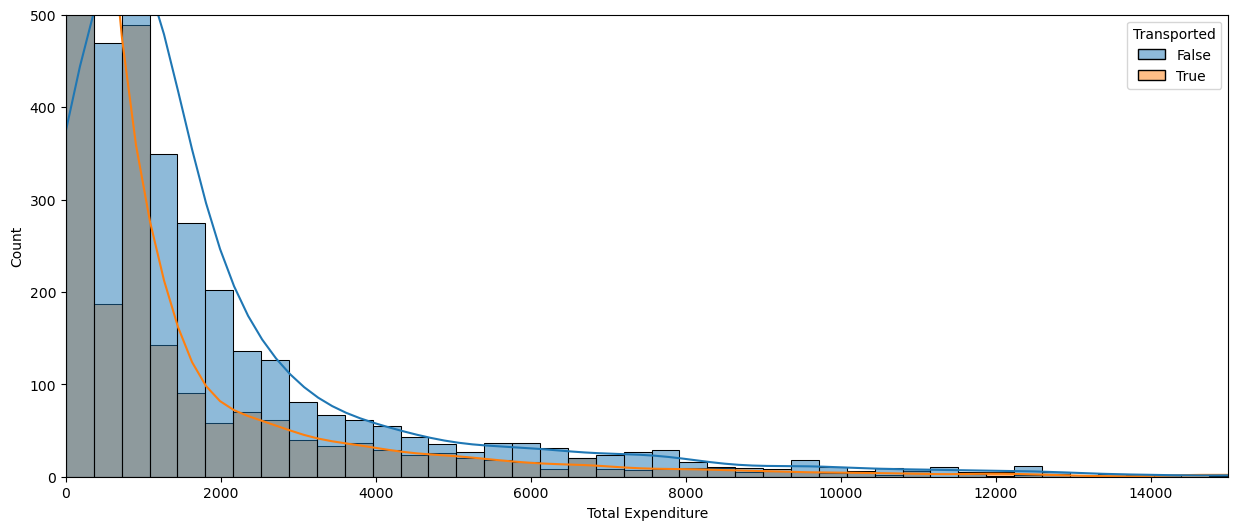

In [41]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=train, kde=True,bins=100)
plt.ylim(0,500)
plt.xlim(0,15000)


# Data Pre-Processing

In [42]:
df_samp = train.isnull().sum().to_frame().rename(columns={0:"No. of Missing values"})
df_samp["% of Missing values"] = round(train.isnull().sum()*100/len(train),2)
df_samp

,No. of Missing values,% of Missing values
PassengerId,0,0.00
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,0,0.00
Destination,182,2.09
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


We can see that there are still some missing values in the dataset

In [43]:
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
imputer1 = SimpleImputer(strategy="most_frequent")
imputer2 = SimpleImputer(strategy="median")

In [46]:
def fillingMissingData(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [47]:
fillingMissingData(train)
fillingMissingData(test)

In [48]:
train.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name                 0
Transported          0
Solo                 0
NoOfGroupMem         0
Cabin_Deck           0
Cabin_Side           0
CabinRegion1         0
CabinRegion2         0
CabinRegion3         0
CabinRegion4         0
CabinRegion5         0
CabinRegion6         0
CabinRegion7         0
CabinRegion8         0
Age 0-9              0
Age 10-19            0
Age 20-29            0
Age 30-39            0
Age 40-49            0
Age 50 and above     0
Total Expenditure    0
dtype: int64

In [49]:
test.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name                 0
Solo                 0
NoOfGroupMem         0
Cabin_Deck           0
Cabin_Side           0
CabinRegion1         0
CabinRegion2         0
CabinRegion3         0
CabinRegion4         0
CabinRegion5         0
CabinRegion6         0
CabinRegion7         0
CabinRegion8         0
Age 0-9              0
Age 10-19            0
Age 20-29            0
Age 30-39            0
Age 40-49            0
Age 50 and above     0
Total Expenditure    0
dtype: int64

We can see that there are is no any null data in either of the datasets.

In [50]:
train.duplicated().sum()

0

In [51]:
test.duplicated().sum()

0

There is no even duplicate data present in the either of the datasets.

In [52]:
train.select_dtypes(include=["object"]).nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6561
Destination       3
VIP               2
Name           8473
Cabin_Deck        8
Cabin_Side        2
dtype: int64

After all feature engineering, we have some columns which have high cardinality. So, now we will drop these features.

**Note:** We need the passengerid column in order to submit the answer in the kaggle.

In [53]:
passenger = test['PassengerId']

In [54]:
train.drop(columns = ['PassengerId', 'Cabin', 'Name'], inplace = True)
test.drop(columns = ['PassengerId', 'Cabin', 'Name'], inplace = True)

In [55]:
train.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NoOfGroupMem,Total Expenditure
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,220.009318,448.434027,169.572300,304.588865,298.261820,2.035546,1440.866329
std,660.519050,1595.790627,598.007164,1125.562559,1134.126417,1.596347,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,716.000000
75%,41.000000,61.000000,22.000000,53.000000,40.000000,3.000000,1441.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000,35987.000000


In [56]:
train.dtypes

HomePlanet            object
CryoSleep             object
Destination           object
VIP                   object
RoomService          float64
FoodCourt            float64
ShoppingMall         float64
Spa                  float64
VRDeck               float64
Transported             bool
Solo                    bool
NoOfGroupMem           int64
Cabin_Deck            object
Cabin_Side            object
CabinRegion1            bool
CabinRegion2            bool
CabinRegion3            bool
CabinRegion4            bool
CabinRegion5            bool
CabinRegion6            bool
CabinRegion7            bool
CabinRegion8            bool
Age 0-9                 bool
Age 10-19               bool
Age 20-29               bool
Age 30-39               bool
Age 40-49               bool
Age 50 and above        bool
Total Expenditure    float64
dtype: object

Here cryosleep and VIP contains bool values. so it is better to convert these into bool datatype

In [57]:
train[['CryoSleep', 'VIP']] = train[['CryoSleep', 'VIP']].astype(bool)
test[['CryoSleep', 'VIP']] = test[['CryoSleep', 'VIP']].astype(bool)

In [58]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Solo,NoOfGroupMem,Cabin_Deck,Cabin_Side,CabinRegion1,CabinRegion2,CabinRegion3,CabinRegion4,CabinRegion5,CabinRegion6,CabinRegion7,CabinRegion8,Age 0-9,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50 and above,Total Expenditure
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,True,1,B,P,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,True,True,1,F,S,True,False,False,False,False,False,False,False,False,False,True,False,False,False,736.0
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,False,False,2,A,S,True,False,False,False,False,False,False,False,False,False,False,False,False,True,10383.0
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,False,False,2,A,S,True,False,False,False,False,False,False,False,False,False,False,True,False,False,5176.0
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,True,True,1,F,S,True,False,False,False,False,False,False,False,False,True,False,False,False,False,1091.0


In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [60]:
enc = LabelEncoder()

In [61]:
train.columns.tolist()

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Solo',
 'NoOfGroupMem',
 'Cabin_Deck',
 'Cabin_Side',
 'CabinRegion1',
 'CabinRegion2',
 'CabinRegion3',
 'CabinRegion4',
 'CabinRegion5',
 'CabinRegion6',
 'CabinRegion7',
 'CabinRegion8',
 'Age 0-9',
 'Age 10-19',
 'Age 20-29',
 'Age 30-39',
 'Age 40-49',
 'Age 50 and above',
 'Total Expenditure']

In [62]:
tr_cols = ['CryoSleep',
 'VIP',
 'Transported',
 'Solo',
 'Cabin_Deck',
 'Cabin_Side',
 'CabinRegion1',
 'CabinRegion2',
 'CabinRegion3',
 'CabinRegion4',
 'CabinRegion5',
 'CabinRegion6',
 'CabinRegion7',
 'CabinRegion8',
 'Age 0-9',
 'Age 10-19',
 'Age 20-29',
 'Age 30-39',
 'Age 40-49',
 'Age 50 and above']

te_cols = ['CryoSleep',
 'VIP',
 'Solo',
 'Cabin_Deck',
 'Cabin_Side',
 'CabinRegion1',
 'CabinRegion2',
 'CabinRegion3',
 'CabinRegion4',
 'CabinRegion5',
 'CabinRegion6',
 'CabinRegion7',
 'CabinRegion8',
 'Age 0-9',
 'Age 10-19',
 'Age 20-29',
 'Age 30-39',
 'Age 40-49',
 'Age 50 and above']

train[tr_cols] = train[tr_cols].apply(enc.fit_transform)
test[te_cols] = test[te_cols].apply(enc.fit_transform)

In [63]:
train.head()

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Solo,NoOfGroupMem,Cabin_Deck,Cabin_Side,CabinRegion1,CabinRegion2,CabinRegion3,CabinRegion4,CabinRegion5,CabinRegion6,CabinRegion7,CabinRegion8,Age 0-9,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50 and above,Total Expenditure
0,Europa,0,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
1,Earth,0,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,1,1,1,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,736.0
2,Europa,0,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,10383.0
3,Europa,0,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5176.0
4,Earth,0,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,1,1,1,5,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1091.0


In [64]:
train = pd.get_dummies(train,columns=['HomePlanet', 'Destination'])
test = pd.get_dummies(test,columns=['HomePlanet', 'Destination'])

In [65]:
train.head()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Solo,NoOfGroupMem,Cabin_Deck,Cabin_Side,CabinRegion1,CabinRegion2,CabinRegion3,CabinRegion4,CabinRegion5,CabinRegion6,CabinRegion7,CabinRegion8,Age 0-9,Age 10-19,Age 20-29,Age 30-39,Age 40-49,Age 50 and above,Total Expenditure,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,1,0,0,0,1
1,0,0,109.0,9.0,25.0,549.0,44.0,1,1,1,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,736.0,1,0,0,0,0,1
2,0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,10383.0,0,1,0,0,0,1
3,0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5176.0,0,1,0,0,0,1
4,0,0,303.0,70.0,151.0,565.0,2.0,1,1,1,5,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1091.0,1,0,0,0,0,1


In [66]:
X = train.drop(columns = ['Transported'])
y = train[['Transported']]

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [68]:
scaler = StandardScaler()

In [69]:
X_scaled = scaler.fit_transform(X)

In [70]:
test_scaled = scaler.fit_transform(test)

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

Unscaled Data splitting

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [73]:
print(X_train.shape, y_test.shape)

(6954, 32) (1739, 1)


Data splitting of Scaled Data

In [74]:
Xs_train,Xs_test,ys_train,ys_test = train_test_split(X_scaled,y,test_size=0.2)

In [75]:
print(Xs_train.shape, Xs_test.shape)

(6954, 32) (1739, 32)


In [76]:
print(ys_train.shape, ys_test.shape)

(6954, 1) (1739, 1)


# Models for Scaled data

* Logistic Regression 
* K Nearest Neighbors
* Support Vector Classifier
* Naive - Bayes

In [77]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
Testing_Accuracy_Score = []

In [80]:
def modelPredictionScaled(model):
    model.fit(Xs_train, ys_train)
    pred = model.predict(Xs_test)
    
    Testing_Accuracy_Score.append(accuracy_score(ys_test, pred)*100)
    
    print(classification_report(ys_test, pred))
    print('\n'+'.'*99+'\n')
    print(confusion_matrix(ys_test, pred))

**Logistic Regression**

In [81]:
modelPredictionScaled(LogisticRegression())

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       863
           1       0.78      0.81      0.80       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739


...................................................................................................

[[663 200]
 [165 711]]


**K Nearest Neighbors**

In [82]:
modelPredictionScaled(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       863
           1       0.76      0.73      0.75       876

    accuracy                           0.75      1739
   macro avg       0.75      0.75      0.75      1739
weighted avg       0.75      0.75      0.75      1739


...................................................................................................

[[659 204]
 [233 643]]


**Support Vector Classifier**

In [83]:
modelPredictionScaled(SVC())

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       863
           1       0.78      0.78      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739


...................................................................................................

[[673 190]
 [192 684]]


**Naive-Bayes**

In [84]:
modelPredictionScaled(GaussianNB())

              precision    recall  f1-score   support

           0       0.84      0.52      0.64       863
           1       0.66      0.90      0.76       876

    accuracy                           0.71      1739
   macro avg       0.75      0.71      0.70      1739
weighted avg       0.75      0.71      0.70      1739


...................................................................................................

[[451 412]
 [ 87 789]]


# Models For Unscaled Data

* Decision Tree
* Random Forest
* Ada Boost
* Gradient Boost
* LGBM
* XGBoost
* CatBoost

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [86]:
def modelPredictionUnscaled(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    Testing_Accuracy_Score.append(accuracy_score(y_test, pred)*100)
    
    print(classification_report(y_test, pred))
    print('\n'+'.'*99+'\n')
    print(confusion_matrix(y_test, pred))

**Decision-Tree Classifier**

In [87]:
modelPredictionUnscaled(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       840
           1       0.77      0.72      0.74       899

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739


...................................................................................................

[[641 199]
 [250 649]]


**Random Forest Classifier**

In [88]:
modelPredictionUnscaled(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       840
           1       0.83      0.76      0.79       899

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


...................................................................................................

[[704 136]
 [220 679]]


**Ada-Boost Classifier**

In [89]:
modelPredictionUnscaled(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       840
           1       0.78      0.80      0.79       899

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739


...................................................................................................

[[634 206]
 [178 721]]


**Gradient-Boosting Classifier**

In [90]:
modelPredictionUnscaled(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       840
           1       0.80      0.82      0.81       899

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


...................................................................................................

[[652 188]
 [163 736]]


**LightGBM Classifier**

In [91]:
modelPredictionUnscaled(LGBMClassifier())

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       840
           1       0.81      0.80      0.81       899

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


...................................................................................................

[[671 169]
 [177 722]]


**XGB Classifier**

In [92]:
modelPredictionUnscaled(XGBClassifier())

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       840
           1       0.81      0.78      0.80       899

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739


...................................................................................................

[[678 162]
 [194 705]]


**CatBoost Classifier**

In [93]:
modelPredictionUnscaled(CatBoostClassifier(verbose = False))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       840
           1       0.82      0.81      0.82       899

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739


...................................................................................................

[[677 163]
 [168 731]]


In [94]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [95]:
Testing_Accuracy_Score

[79.01092581943647,
 74.87061529614721,
 78.0333525014376,
 71.30534790109259,
 74.18056354226566,
 79.52846463484762,
 77.91834387579068,
 79.81598619896492,
 80.10350776308222,
 79.52846463484762,
 80.96607245543416]

In [96]:
x = set(Testing_Accuracy_Score)

In [97]:
x

{71.30534790109259,
 74.18056354226566,
 74.87061529614721,
 77.91834387579068,
 78.0333525014376,
 79.01092581943647,
 79.52846463484762,
 79.81598619896492,
 80.10350776308222,
 80.96607245543416}

In [98]:
df = pd.DataFrame({"Algorithms":models, "Testing Score Accuracy":Testing_Accuracy_Score})

In [99]:
df

,Algorithms,Testing Score Accuracy
0,Logistic Regression,79.010926
1,KNN,74.870615
2,SVM,78.033353
3,Naive Bayes,71.305348
4,Decision Tree,74.180564
5,Random Forest,79.528465
6,Ada Boost,77.918344
7,Gradient Boost,79.815986
8,LGBM,80.103508
9,XGBoost,79.528465


**We can see that CatBoost has the highest accuracy nearly 82%**

# Hyper Parameter Tuning of CatBoost Classifier

In [100]:
model = CatBoostClassifier(verbose=False)

In [101]:
parameters = {"learning_rate":[0.1,0.3,0.5,0.6,0.7], "random_state":[0,42,48,50], "depth":[8,9,10], "iterations":[35,40,50]}

In [102]:
grid_search = GridSearchCV(model, parameters, cv=5, n_jobs=-1)

In [103]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x79d2c92a6170>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [104]:
grid_search.best_score_

0.8077370971662642

In [105]:
best_parameters = grid_search.best_params_

In [106]:
best_parameters

{'depth': 8, 'iterations': 35, 'learning_rate': 0.3, 'random_state': 42}

In [107]:
model = CatBoostClassifier(**best_parameters,verbose=False)

In [108]:
model.fit(X_train,y_train)

In [109]:
predic = model.predict(X_test)

In [110]:
accuracy_score(y_test, predic)

0.8033352501437608

# Predicting Test Data

In [111]:
Test_pred = model.predict(test)

In [112]:
Test_pred

array([1, 0, 1, ..., 1, 1, 1])

In [113]:
len(Test_pred)

4277

**Training of the model and predicting the data is completed.**

In [114]:
passenger.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [115]:
len(passenger)

4277

In [116]:
submit = pd.DataFrame(passenger)

In [117]:
len(submit)

4277

In [118]:
submit.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [119]:
submit['Transported'] = Test_pred

In [120]:
submit.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [121]:
submit["Transported"].replace({1:True,0:False},inplace=True)

In [122]:
submit.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


**Submission File**

In [123]:
submit.to_csv("submission.csv",index=False)